In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
import sklearn.metrics as skm
csv = pd.read_csv('HW4_house-prices.csv')

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)

csv

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
'''
nul_dataframe = pd.isna(csv)
for series_null in nul_dataframe:
    ser = nul_dataframe[series_null]
    print(np.where(ser)[0])
'''
'''
csv.columns
'''

'\ncsv.columns\n'

In [3]:
csv_dummies = pd.get_dummies(csv)

In [4]:
nul_dataframe = pd.isna(csv_dummies)
for series_null in nul_dataframe:
    ser = nul_dataframe[series_null]
    if(len(np.where(ser)[0])):
        csv_dummies[str(series_null)].fillna(value=csv_dummies[str(series_null)].mean(),inplace=True)

In [5]:
sale_price = csv_dummies['SalePrice']

In [6]:
csv_dummies.drop(columns=['Id'])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,0,0,0,1,0,0,0,0,1,0


In [7]:
y_train , y_test = sale_price[:round(len(sale_price)*0.7)] , sale_price[round(len(sale_price)*0.7):]
x_train , x_test = csv_dummies[:round(len(sale_price)*0.7)] , csv_dummies[round(len(sale_price)*0.7):]
y_test = np.array(y_test)

In [8]:
linear_learn = skl.LinearRegression().fit(x_train,y_train)
ridge_learn = skl.Ridge().fit(x_train,y_train)
lasso_learn = skl.Lasso().fit(x_train,y_train)

9.783182194157759e-21 7.63304615141692e-15 0.0030231726258281317


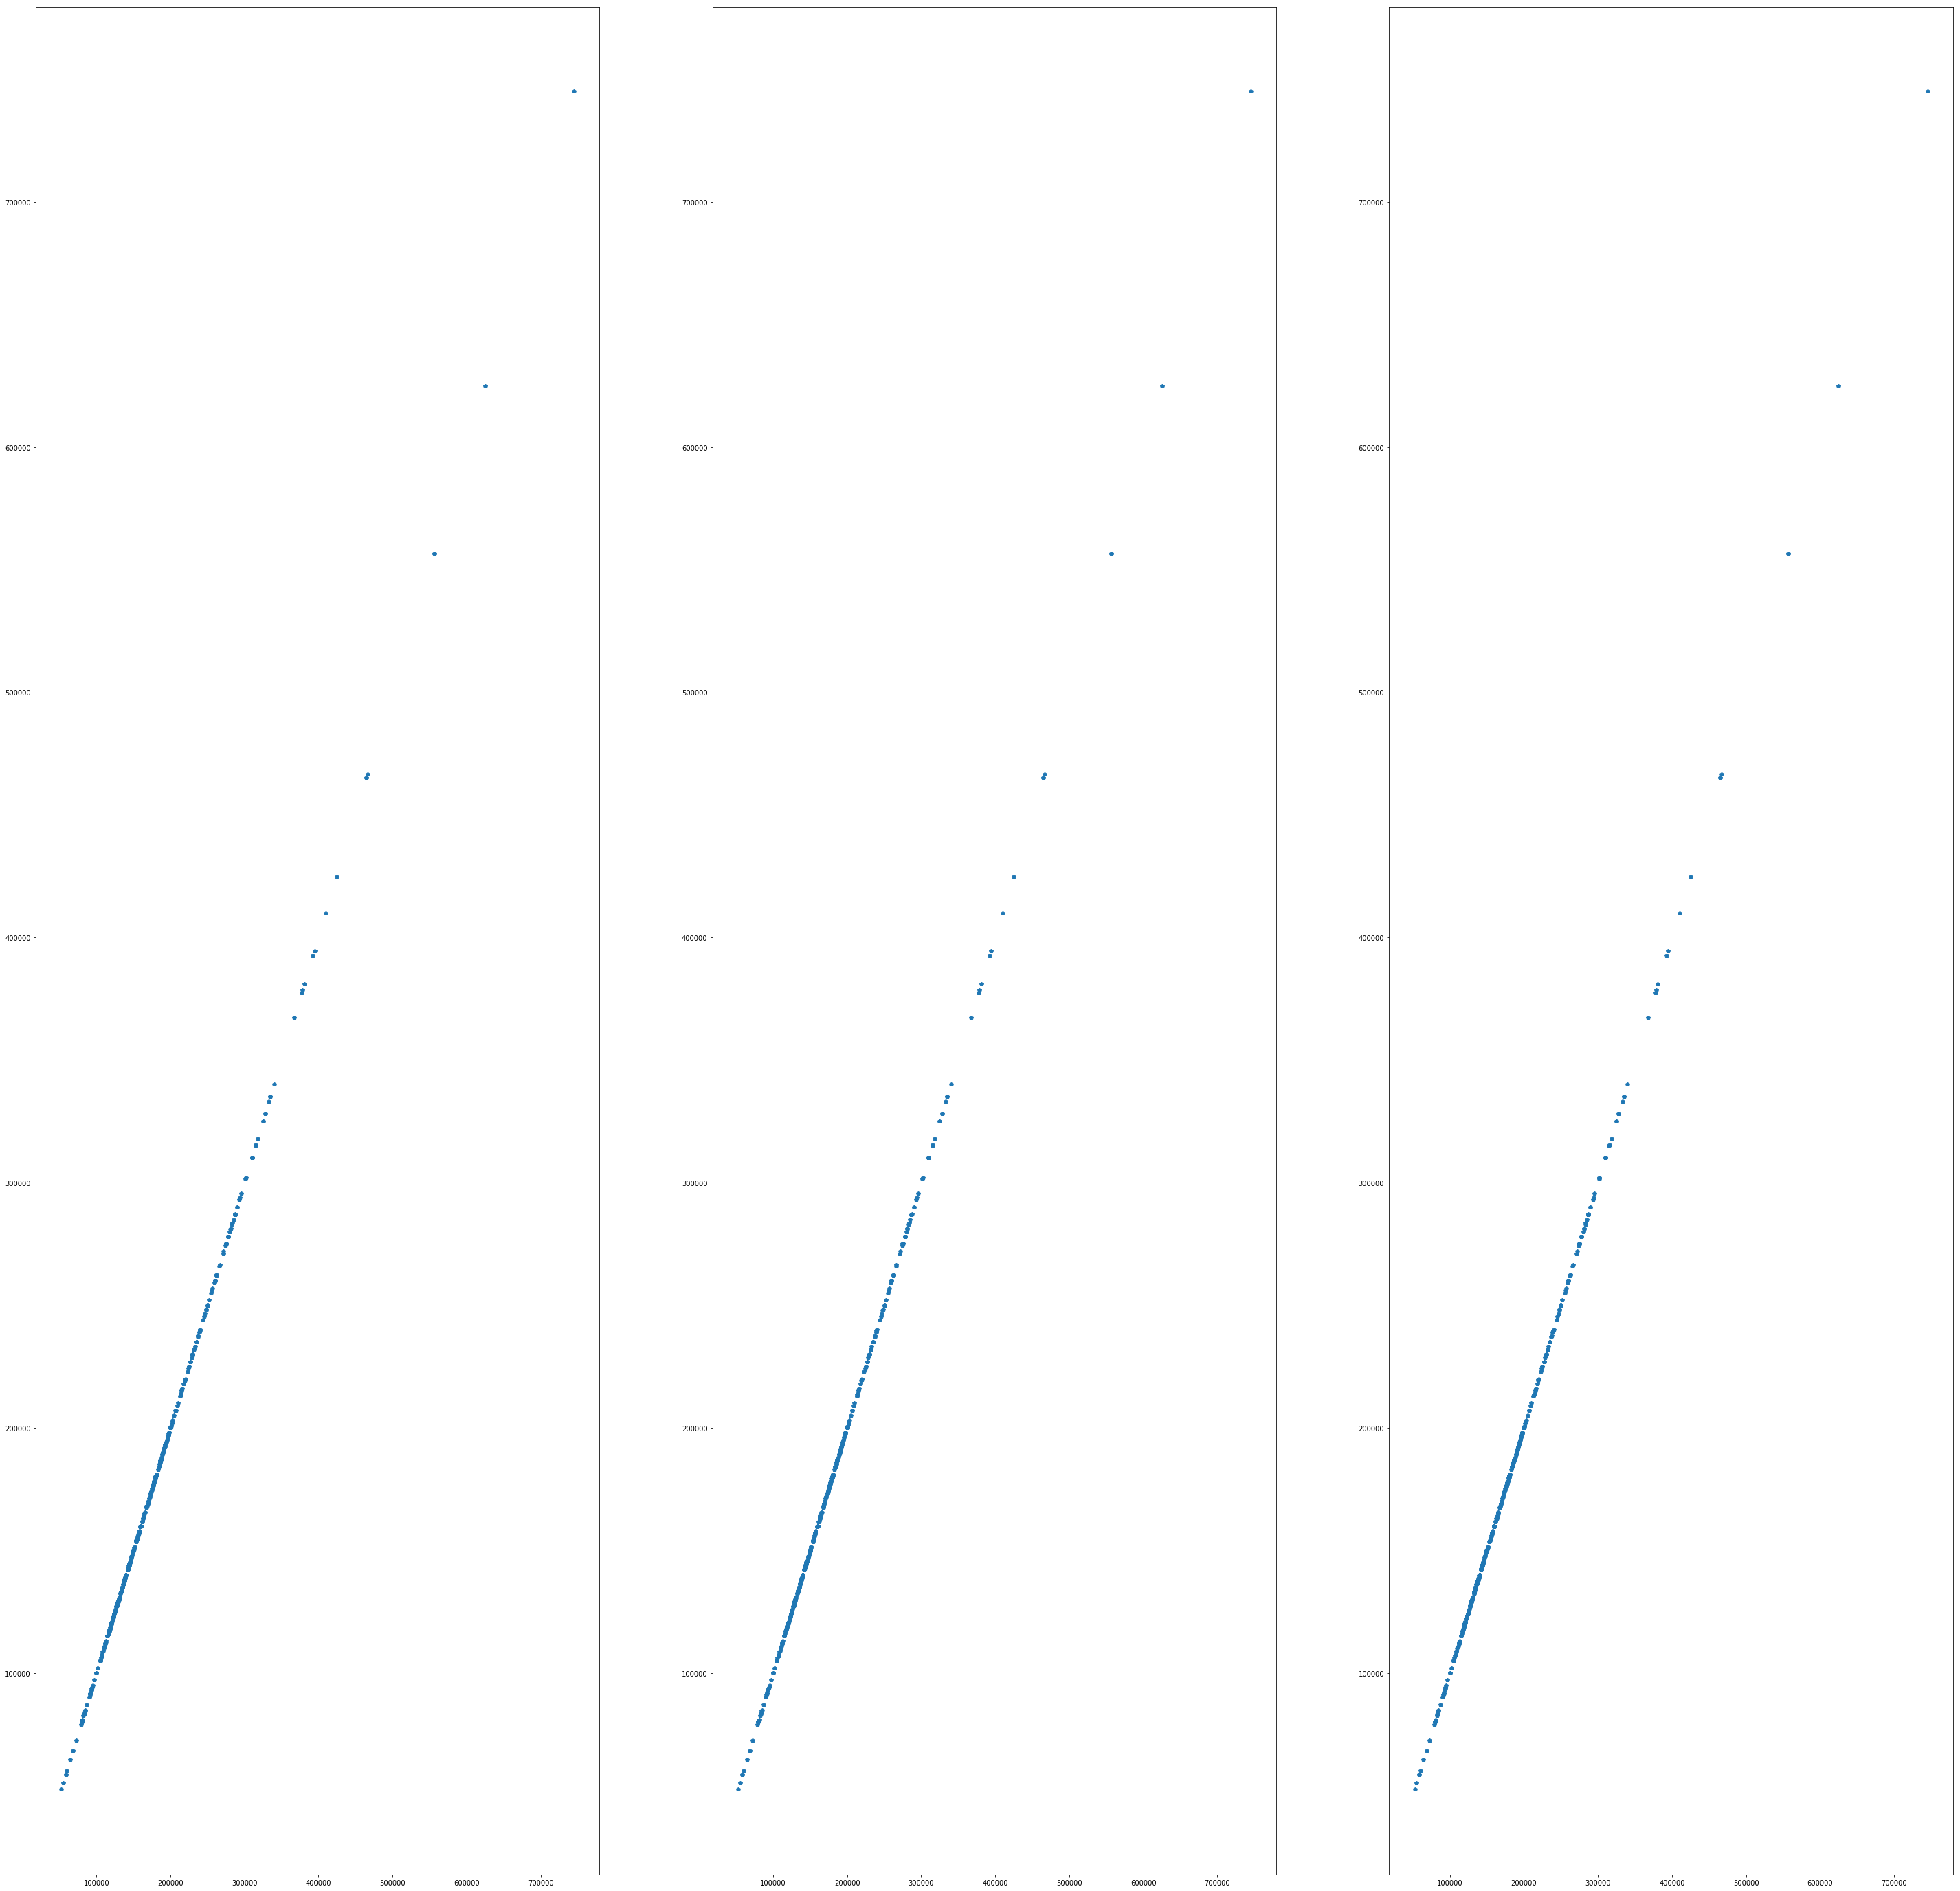

In [9]:
linear_y_predict = linear_learn.predict(x_test)
ridge_y_predict = ridge_learn.predict(x_test)
lasso_y_predict = lasso_learn.predict(x_test)

linear_RSE = skm.mean_squared_error(y_test,linear_y_predict)
ridge_RSE = skm.mean_squared_error(y_test,ridge_y_predict)
lasso_RSE = skm.mean_squared_error(y_test,lasso_y_predict)

print(linear_RSE,ridge_RSE,lasso_RSE)

plt.figure()
_,plot = plt.subplots(1,3,figsize = (50,50))
plot[0].plot(y_test,linear_y_predict,'p')
plot[1].plot(y_test,ridge_y_predict,'p')
plot[2].plot(y_test,lasso_y_predict,'p')